Interation at 0, cost: 1344586832.67428
Interation at 1000, cost: 16523092.63349
Interation at 2000, cost: 15648328.99916
w,b found by gradient descent: 9456.13314753495 25750.616639553562
0.5 year of experiences prediction:30478.68
12 years of experiences prediction:139224.21
15 years of experiences prediction:167592.61


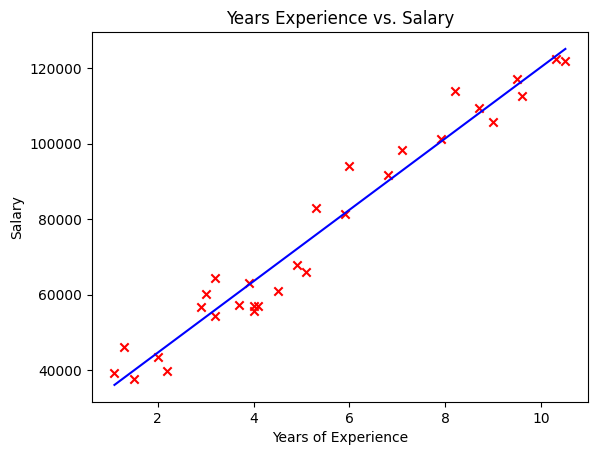

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array ([1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9,5.1,5.3,5.9,6.0,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5])

y_train=np.array([39343.00,46205.00,37731.00,43525.00,39891.00,56642.00,60150.00,54445.00,64445.00,57189.00,63218.00,55794.00,56957.00,57081.00,61111.00,67938.00,66029.00,83088.00,81363.00,93940.00,91738.00,98273.00,101302.00,113812.00,109431.00,105582.00,116969.00,112635.00,122391.00,121872.00])

m=x_train.shape[0]
total_cost=0
def compute_cost(x,y,w,b):
    m=x_train.shape[0]
    predictions=np.dot(x,w)+b
    cost=np.sum((predictions-y)**2)/(2*m)
    return cost

def compute_gradient(x,y,w,b):
    m = len(x)
    predictions = x* w + b  
    errors = predictions - y
    dj_dw = np.sum(errors * x) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db

def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    m = len(x)
    J_history=[]
    w=w_in
    b=b_in
    
    for i in range (num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)
        
            # Save cost J at each iteration
        if i%1000==0:
            print(f'Interation at {i}, cost: {cost:.5f}')
          
    return w, b, J_history

initial_w=0.1
initial_b=0.2

iterations = 3000
alpha = 0.01

w,b,_= gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha,iterations)
print("w,b found by gradient descent:", w, b)

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
    
    # Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Years Experience vs. Salary")
# Set the y-axis label
plt.ylabel('Salary')
# Set the x-axis label
plt.xlabel('Years of Experience')

#predicting salary at 0.5 year above the maximum target provided at 1.1 years
predict1=0.5*w+b
print(f'0.5 year of experiences prediction:{predict1:.2f}')
#predicting salary at 12 years above the maximum target provided at 10.5 years
predict2=12*w+b
print(f'12 years of experiences prediction:{predict2:.2f}')
#predicting salary at 12 years above the maximum target provided at 10.5 years
predict3=15*w+b
print(f'15 years of experiences prediction:{predict3:.2f}')